In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...


##Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

##Text Preprocessing

In [10]:
import re
import string

##Convert uppercase to lowercase

In [12]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [13]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


##Remove Links

In [15]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [16]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [17]:
##Remove Punctuations

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] =data["tweet"].apply(remove_punctuations)

In [21]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

##Remove Numbers

In [24]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [25]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

##Remove Stop Words

In [27]:
!pip install nltk

  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nltk

In [29]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [31]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
data["tweet"] = data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [34]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

##Stemming

In [35]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [36]:
data["tweet"] = data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [37]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [38]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


 ##Building Vocabulary

In [42]:
from collections import Counter
vocab = Counter()

In [43]:
vocab.update(['java','python','python','c++'])

In [44]:
vocab

Counter({'python': 2, 'java': 1, 'c++': 1})

In [46]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [49]:
len(vocab)

15951

In [53]:
tokens = [key for key in vocab if vocab[key] > 20]

In [54]:
len(tokens)

656

In [55]:
tokens

['android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batteri',
 'charg',
 'saturday',
 'summer',
 'like',
 'share',
 'want',

##Save Vocabulary

In [56]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

##Devide dataset

In [57]:
X = data['tweet']
y = data['label']

In [61]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [64]:
X_train.shape

(6336,)

In [65]:
X_test.shape

(1584,)

##Vectorization

In [71]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [72]:
vectorized_x_train = vectorizer(X_train, tokens)

In [75]:
vectorized_x_test = vectorizer(X_test, tokens)

In [76]:
y_train.value_counts()

label
0    4715
1    1621
Name: count, dtype: int64

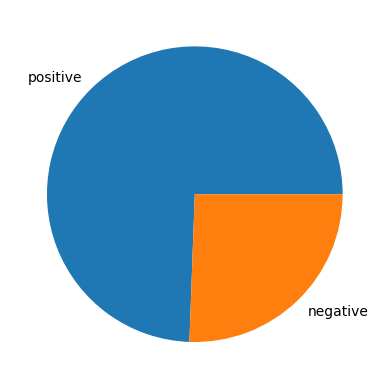

In [77]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['positive', 'negative'])
plt.show()

In [78]:
###Handle Imbalanced dataset

In [80]:
!pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorize_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorize_x_train_smote.shape,y_train_smote.shape)

(9430, 656) (9430,)


In [82]:
y_train_smote.value_counts()

label
0    4715
1    4715
Name: count, dtype: int64

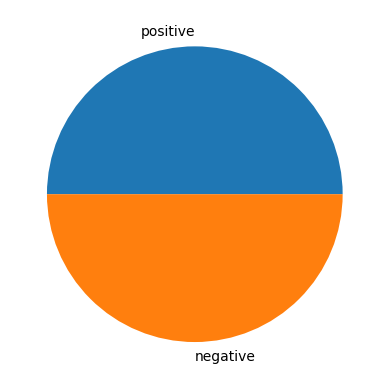

In [83]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['positive', 'negative'])
plt.show()

###Model Training and Evaluations

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [86]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training Scores :\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    rec = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training Scores :\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


##Logistic Regression

In [105]:
lr = LogisticRegression()
lr.fit(vectorize_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorize_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores :
	Accuracy = 0.924
	Precision = 0.898
	Recall = 0.956
	F1-Score = 0.926
Training Scores :
	Accuracy = 0.866
	Precision = 0.69
	Recall = 0.862
	F1-Score = 0.766


##Naive byse

In [106]:
mnb = MultinomialNB()
mnb.fit(vectorize_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorize_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores :
	Accuracy = 0.893
	Precision = 0.861
	Recall = 0.939
	F1-Score = 0.898
Training Scores :
	Accuracy = 0.841
	Precision = 0.632
	Recall = 0.904
	F1-Score = 0.744


###Decision Tree

In [107]:
dtc = DecisionTreeClassifier()
dtc.fit(vectorize_x_train_smote,y_train_smote)

y_train_pred = dtc.predict(vectorize_x_train_smote)

y_test_pred = dtc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores :
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Training Scores :
	Accuracy = 0.816
	Precision = 0.634
	Recall = 0.662
	F1-Score = 0.647


###Random Forest

In [108]:
rf = RandomForestClassifier()
rf.fit(vectorize_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorize_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores :
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Training Scores :
	Accuracy = 0.862
	Precision = 0.721
	Recall = 0.748
	F1-Score = 0.735


###Support Vector machine

In [109]:
svc = SVC()
svc.fit(vectorize_x_train_smote,y_train_smote)

y_train_pred = svc.predict(vectorize_x_train_smote)

y_test_pred = svc.predict(vectorized_x_test)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores :
	Accuracy = 0.969
	Precision = 0.948
	Recall = 0.993
	F1-Score = 0.97
Training Scores :
	Accuracy = 0.874
	Precision = 0.722
	Recall = 0.827
	F1-Score = 0.771


##Save Model

In [ ]:
import pickle

with open(../static/model','wb') as file:
